<a href="https://colab.research.google.com/github/shivamani36/shivamani36/blob/main/hand%20written%20digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HAND WRITTEN DIGIT PREDDICTION - CLASSIFCATION ANALYSIS

OBJECTIVE :-

This digit dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we could have to first transform it into a feature vector with length 64.
The images attribute of the datasheet
Stores 18 to 8 arrays. of recycle values for each image. We will use these arrays to visualize the First, 4 images target. attribute of the data sheet stores the digit image represent

# import library

In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

# IMPORT DATA

In [35]:
from sklearn.datasets import load_digits

In [36]:
sm = load_digits()

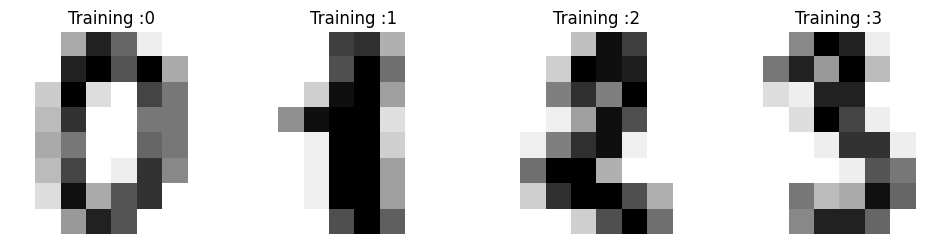

In [37]:
_,axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
for ax,image,label in zip(axes,sm.images ,sm.target):
    ax.set_axis_off()
    ax.imshow(image ,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training :%i" %label)


In [38]:
sm.images.shape

(1797, 8, 8)

In [39]:
sm.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [40]:
sm.images[0].shape

(8, 8)

In [41]:
len(sm.images)

1797

In [42]:
n_samples = len(sm.images)
data = sm.images.reshape((n_samples,-1))

In [43]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [44]:
data[0].shape

(64,)

## Scailing Image data

In [45]:
data.min()

0.0

In [46]:
data.max()

16.0

In [47]:
data=data/16

In [48]:
data.min()

0.0

In [49]:
data.max()

1.0

In [50]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [51]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(data, sm.target,test_size=0.3)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier()

In [61]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [62]:
y_pred = rf.predict(x_test)

In [65]:
y_pred

array([7, 7, 4, 3, 3, 8, 4, 0, 0, 0, 5, 1, 6, 4, 5, 5, 2, 2, 6, 6, 8, 8,
       9, 7, 1, 1, 9, 4, 1, 6, 9, 3, 1, 6, 7, 6, 6, 3, 3, 3, 4, 9, 5, 8,
       4, 7, 3, 1, 3, 6, 1, 7, 4, 2, 1, 5, 4, 7, 1, 0, 4, 7, 2, 1, 8, 3,
       5, 1, 6, 2, 9, 2, 4, 6, 3, 3, 9, 8, 2, 0, 0, 9, 2, 7, 9, 1, 8, 0,
       2, 3, 6, 0, 7, 2, 2, 4, 4, 7, 6, 6, 7, 0, 2, 6, 5, 5, 7, 2, 7, 1,
       7, 7, 0, 8, 3, 6, 4, 3, 3, 3, 7, 7, 3, 8, 5, 6, 9, 1, 1, 4, 1, 8,
       2, 1, 5, 2, 0, 9, 2, 9, 8, 5, 6, 0, 1, 6, 1, 9, 5, 8, 2, 1, 1, 0,
       4, 1, 2, 6, 1, 2, 5, 3, 0, 5, 9, 8, 5, 9, 6, 5, 8, 4, 0, 1, 9, 7,
       9, 2, 2, 7, 3, 7, 9, 2, 0, 6, 7, 0, 9, 1, 3, 4, 9, 7, 0, 6, 1, 5,
       0, 2, 8, 0, 1, 9, 1, 0, 1, 9, 7, 1, 7, 6, 6, 3, 8, 6, 6, 6, 8, 5,
       3, 0, 8, 3, 2, 6, 8, 6, 8, 7, 7, 0, 7, 4, 3, 6, 4, 4, 2, 7, 2, 9,
       5, 2, 9, 3, 5, 1, 0, 0, 2, 5, 3, 9, 3, 1, 2, 8, 6, 1, 7, 3, 0, 9,
       0, 4, 3, 0, 9, 3, 2, 2, 7, 9, 7, 8, 1, 9, 2, 2, 8, 0, 0, 8, 4, 2,
       1, 3, 4, 1, 1, 4, 1, 2, 1, 1, 1, 0, 2, 8, 5,

# Model Accuracy


In [68]:
from sklearn.metrics import confusion_matrix , classification_report

In [70]:
confusion_matrix(y_test , y_pred)

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 45,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2, 44,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 55]])

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      1.00      0.99        60
           2       1.00      1.00      1.00        64
           3       0.98      0.95      0.97        61
           4       0.98      1.00      0.99        41
           5       0.98      0.98      0.98        46
           6       1.00      0.98      0.99        53
           7       0.91      1.00      0.95        53
           8       1.00      0.96      0.98        46
           9       0.98      0.95      0.96        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

